In [112]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [115]:
df.sort_values('data_somministrazione', inplace=True)

In [116]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0
96,2020-12-27,Pfizer/BioNTech,PIE,50-59,104,189,250,40,3,0,293,0
97,2020-12-27,Pfizer/BioNTech,PIE,60-69,94,37,113,9,9,0,131,0
98,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,19,0
99,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0


In [117]:
df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [118]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


data_somministrazione,01-01-2021,02-01-2021,03-01-2021,04-01-2021,05-01-2021,06-01-2021,07-01-2021,08-01-2021,09-01-2021,10-01-2021,...,18-01-2021,19-01-2021,20-01-2021,21-01-2021,22-01-2021,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,3.0,20.0,5.0,20.0,49.0,49.0,40.0,53.0,84.0,155.0,...,54.0,36.0,24.0,19.0,17.0,0.0,0.0,0.0,2.0,23.0
20-29,945.0,3601.0,3520.0,6039.0,6865.0,6533.0,7778.0,8943.0,8733.0,7370.0,...,3212.0,2432.0,1805.0,1048.0,510.0,654.0,109.0,72.0,488.0,2343.0
30-39,1955.0,6906.0,6092.0,12034.0,13620.0,11086.0,14988.0,15014.0,13143.0,9833.0,...,4291.0,3329.0,2719.0,1522.0,667.0,1029.0,169.0,178.0,866.0,4218.0
40-49,2441.0,8509.0,7779.0,14616.0,16768.0,12804.0,19033.0,19313.0,16029.0,11426.0,...,5580.0,4159.0,3632.0,1870.0,882.0,1447.0,241.0,198.0,1211.0,5614.0
50-59,3212.0,10818.0,10046.0,19871.0,22960.0,17717.0,26379.0,26258.0,22019.0,15049.0,...,7302.0,5254.0,4556.0,2379.0,1104.0,2127.0,287.0,281.0,1252.0,7003.0
60-69,1676.0,6456.0,5871.0,11688.0,13782.0,11689.0,15250.0,15325.0,16382.0,10557.0,...,4181.0,3220.0,2653.0,1470.0,678.0,1453.0,172.0,171.0,563.0,3482.0
70-79,183.0,581.0,519.0,1070.0,1501.0,1615.0,2197.0,2535.0,2877.0,2164.0,...,1783.0,1621.0,1411.0,842.0,358.0,132.0,0.0,8.0,90.0,549.0
80-89,279.0,777.0,595.0,1350.0,1824.0,1509.0,2916.0,2887.0,2811.0,1664.0,...,3821.0,3368.0,2714.0,1672.0,634.0,125.0,1.0,9.0,158.0,997.0
90+,325.0,724.0,531.0,1234.0,1707.0,1384.0,2630.0,2487.0,2251.0,1255.0,...,2627.0,2311.0,2012.0,1244.0,480.0,78.0,0.0,9.0,94.0,766.0


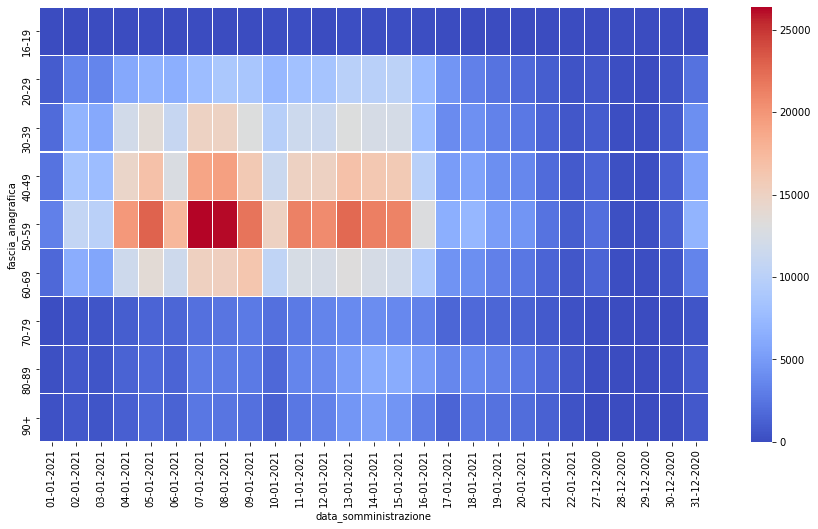

In [119]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [120]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [121]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [122]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [123]:
df1['perc_tot'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(2)

In [131]:
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot').sort_index(ascending=False)

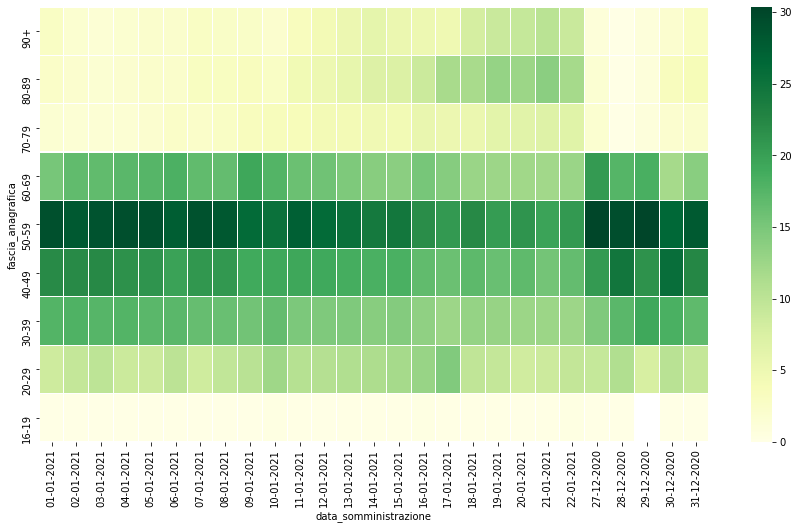

In [132]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_pivot, cmap='YlGn', linecolor='white', linewidths=0.1)

# Analisi Popo

In [140]:
pop = pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]
pop.columns

MultiIndex([(          'Età',                'Età'),
            ('Celibi/Nubili',      'Celibi/Nubili'),
            (  'Coniugati/e',        'Coniugati/e'),
            (     'Vedovi/e',           'Vedovi/e'),
            ( 'Divorziati/e',       'Divorziati/e'),
            (       'Maschi',             'Maschi'),
            (      'Femmine',            'Femmine'),
            (       'Totale', 'Unnamed: 7_level_1'),
            (       'Totale',                  '%')],
           )

In [153]:
pop = pop[['Età', 'Totale']]
pop.Totale.split()

AttributeError: 'DataFrame' object has no attribute 'split'

In [152]:
pop.reset_index().columns

MultiIndex([( 'index',                   ''),
            (   'Età',                'Età'),
            ('Totale', 'Unnamed: 7_level_1'),
            ('Totale',                  '%')],
           )

In [158]:
pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia')[11]

,Età,Maschi italiani,Femmine italiane,Totale italiani,Maschi stranieri,Femmine straniere,Totale stranieri,Maschi,Femmine,Totale
0,0 anni,237.982,225.529,463.511,35.899,33.581,69.480,273.881,259.110,532.991
1,1 anni,242.993,229.339,472.332,35.902,33.785,69.687,278.895,263.124,542.019
2,2 anni,248.875,235.483,484.358,35.933,33.438,69.371,284.808,268.921,553.729
3,3 anni,254.084,241.284,495.368,34.425,32.201,66.626,288.509,273.485,561.994
4,4 anni,255.753,241.345,497.098,31.983,30.122,62.105,287.736,271.467,559.203
...,...,...,...,...,...,...,...,...,...,...
97,97 anni,4.640,17.742,22.382,21,47,68,4.661,17.789,22.450
98,98 anni,3.121,12.466,15.587,10,27,37,3.131,12.493,15.624
99,99 anni,1.926,8.238,10.164,8,20,28,1.934,8.258,10.192
100,100 anni e più,2.440,12.579,15.019,20,41,61,2.460,12.620,15.080
